# Part I - Loan Data from Prosper
## by Joshua Alabi

## Introduction

 ### This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, borrower employment status, borrower credit  history, and the latest payment information.

### The main purposes of this project are to summarize the characteristics of  variables that can affect the loan status and to get some ideas about the  relationships among multiple variables using summary statistics and data  visualizations.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# expand maximun number of columns and row dosplayed
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#load and read the data
loan  = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# view the statistics
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [6]:
#check for duplicates
sum(loan.duplicated()) 

0

In [7]:
# count null values for each columns
loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

### What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 features 
### What is/are the main feature(s) of interest in your dataset?

> What affects the borrower’s APR or interest rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I think that the borrowers monthly income, Occupation, Prosper rating, employment status and even the loan amount will have effects on the APR.

## Univariate Exploration


### Employment Status

In [8]:
order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(ordered_var)

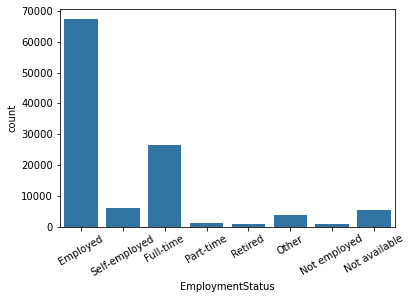

In [9]:
color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'EmploymentStatus', color = color);
plt.xticks(rotation=30);

**Observation(s)**
> 1. The majority of borrowers are **'Employed** followed by **'Full-time**.

### Top 10 Occupation

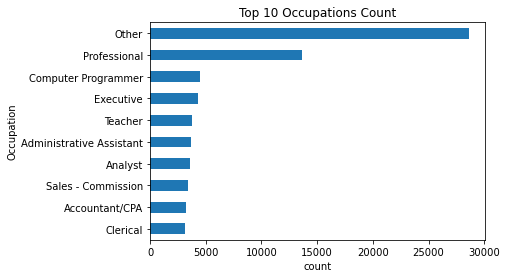

In [10]:
loan['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(12,12)

**Observation(s)**
> 1. We have more professionals than every other type of occupation, though "Other" is the majority but its not a clear definition.

### Prosper Rating and Term

In [11]:
# Convert ProsperRating into ordered categorical types
color = sb.color_palette()[0]
order_rate = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order_rate)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)


''

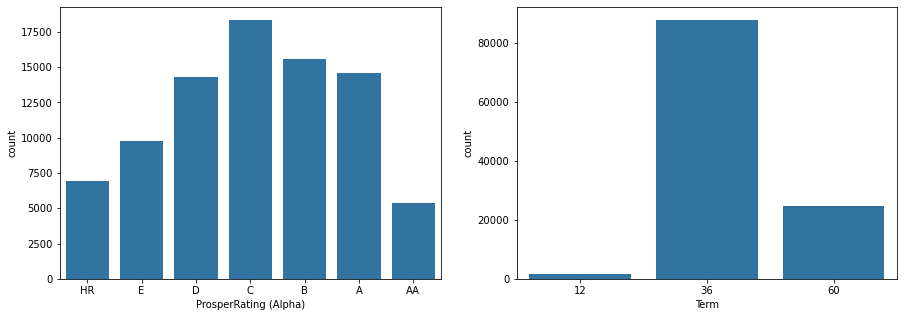

In [12]:
plt.figure(figsize = [15, 5]) 
color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', color = color)
plt.subplot(1, 2, 2)
sb.countplot(data = loan, x = 'Term', color = color)
;

**Observation(s)**
> 1. Rating C has the highest 
> 2. There seems to be a normal distribution base on this ordering
> 3. Most of the loan are at the 36 term

### Loan Status

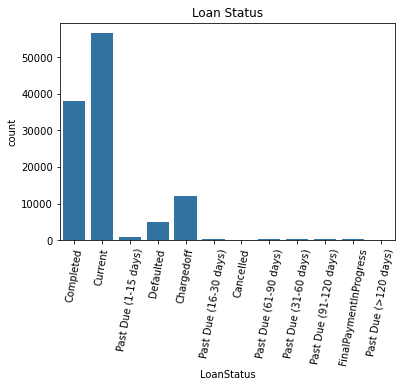

In [13]:
color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'LoanStatus', color = color)
plt.xticks(rotation=80)
plt.title('Loan Status');

**Observation(s)**
> 1. Most loans are "Current" loan
> 2. "Past due days" has several groups
> 3. "Completed" also has a significant record

### Prosper Score Count

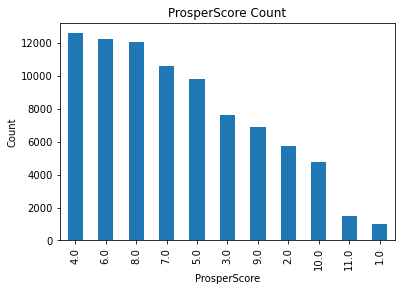

In [14]:
loan['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.fontsize = 12
plt.figsize=(12,12)

**Observation(s)**
> 1. Majority of the Prosper Score is between 4 - 8 even though 4 is the highest>

### Loan Original Amount

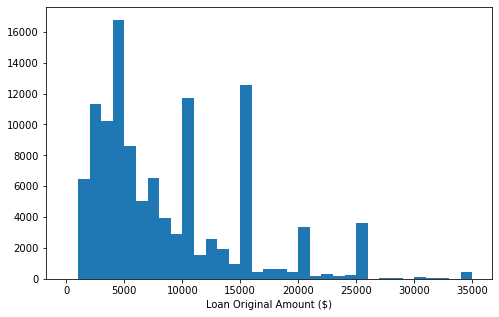

In [15]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan.LoanOriginalAmount.max()+10, 1000)
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount ($)');

**Observation(s)**
> 1. Distribution looks right stewed though we have more than one modal.

### Borrower's Annual Percentage Rate (APR).

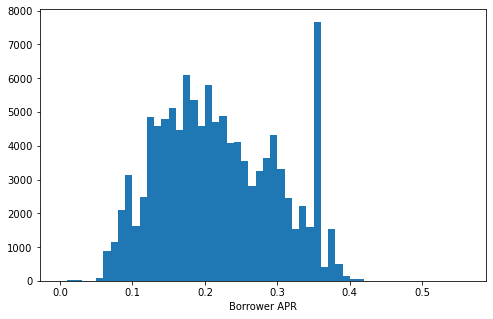

In [16]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

**Observation(s)**
> 1. Distribution looks multi-modal
> 2. Very few loan has value greater than 0.4

### Monthly Borrowers Income.

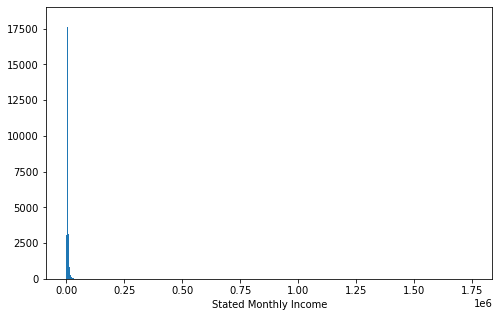

In [17]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan.StatedMonthlyIncome.max()+0.5, 1000)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income');

**Observation(s)**
> This seems like it is stewed towards the right.

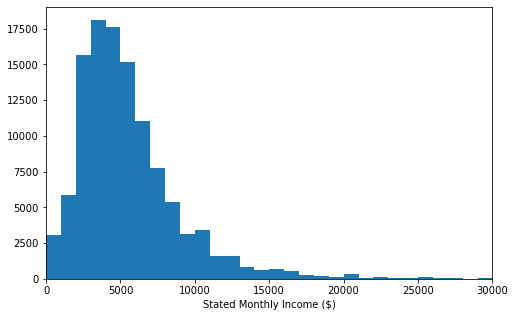

In [18]:
# adding a boundary to the visual above to see distributions clearly
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan.StatedMonthlyIncome.max()+0.5, 1000)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income ($)')
plt.xlim(0, 30000);

**Observation(s)**
> 1. Distribution is uni-modal
> 2. It is right skewed
> 3. Majority if the "Stated Monthly Income" is between 3000-7000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of Borrowers APR looks multimodal. Most values range of 0.05 and 0.4 is observed though some values are after 4.0. No transformation performed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of "stated monthly income" is right skewed. Most are less than 30k, but we have some greater than 100k. Shocking to see that most of borrowers with greater than 100k monthly income does not have lots of record.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Coorelation plot between some columns

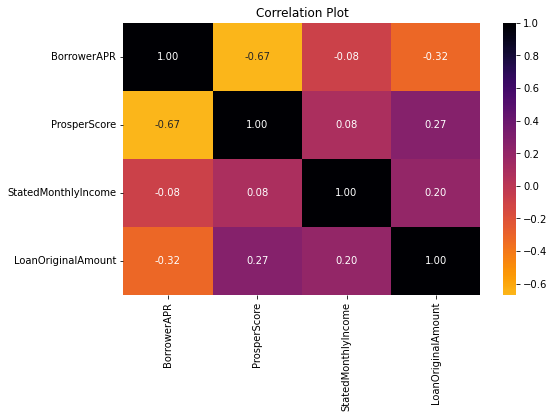

In [19]:
# plot correlation to check relationships

cor_vars = ['BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome'
            , 'LoanOriginalAmount']

plt.figure(figsize = [8, 5])
sb.heatmap(loan[cor_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'inferno_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

**Observation(s)**
> 1. Correlation Plot: There are no strong positive relationships between any pairs. 
> 2. This is negative coorelation between BorrowerAPR and ProsperScore

### ProsperScore and BorrowerAPR comparison using Heatmap and Scatterplot

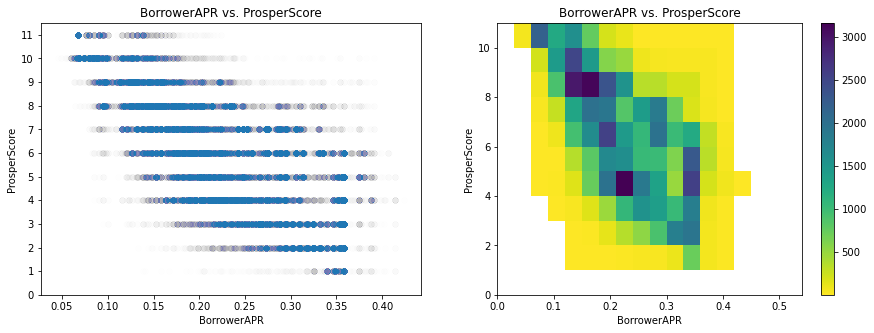

In [20]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loan['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

### How Term, Prosper rating, Employment status and Loan status relate

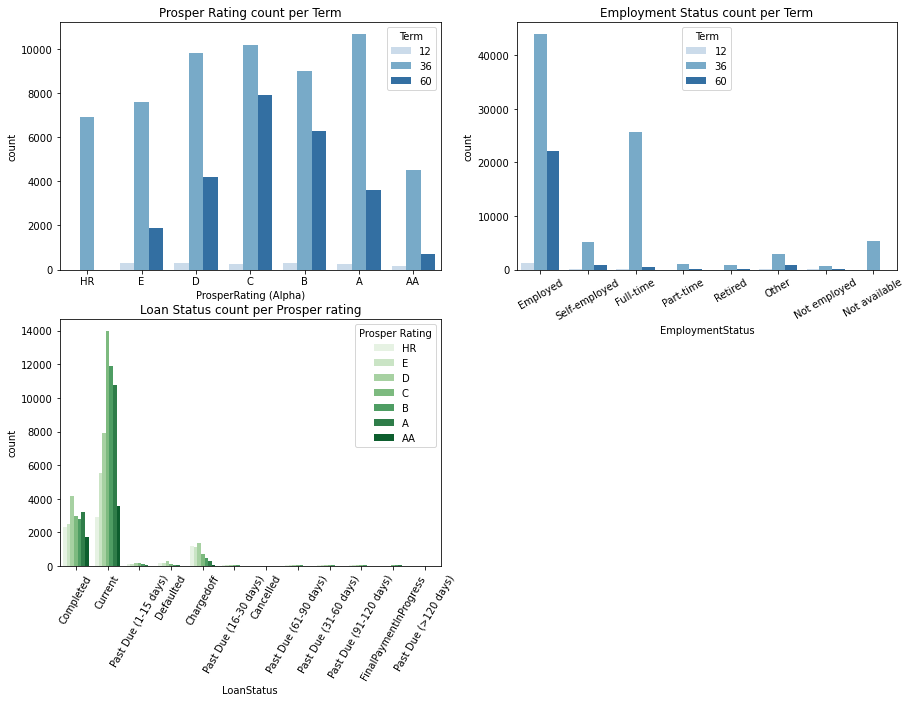

In [21]:
plt.figure(figsize = [15, 10])

# subplot 1: Prosper rating vs term
plt.subplot(2, 2, 1)
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
plt.title('Prosper Rating count per Term')
plt.legend(loc = 'upper right', title = 'Term')

# subplot 2: employment status vs. term
ax = plt.subplot(2, 2, 2)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=30)
plt.title('Employment Status count per Term')

# subplot 3: Prosper rating vs. LoanStatus, use different color palette
ax = plt.subplot(2, 2, 3)
sb.countplot(data = loan, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); 
plt.title('Loan Status count per Prosper rating')
plt.legend(title = 'Prosper Rating')
plt.xticks(rotation=60);

**Observation(s)**
> 1. People that are employed seems to go for 36 month loan term

### Relationship Between some Numerical and Categorical features

/Users/kudiuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kudiuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kudiuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<Figure size 720x720 with 0 Axes>

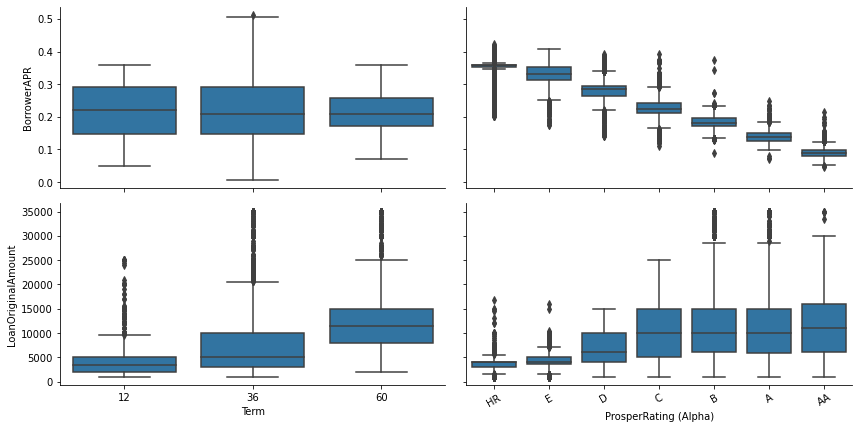

In [36]:
# matrix of numeric features against some categorical features with box plot.

x_var = ['Term', 'ProsperRating (Alpha)']
y_var = ['BorrowerAPR', 'LoanOriginalAmount']

def boxgrid(x, y, **kwargs):
    color = sb.color_palette()[0]
    sb.boxplot(x, y, color = color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = y_var, 
                x_vars = x_var, height = 3, aspect = 2);
g.map(boxgrid);
plt.xticks(rotation=30);


**Observation(s)**
> 1. This shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the prosper rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. 

### Employment and BorrowerAPR relationship using Violin and Box Plot

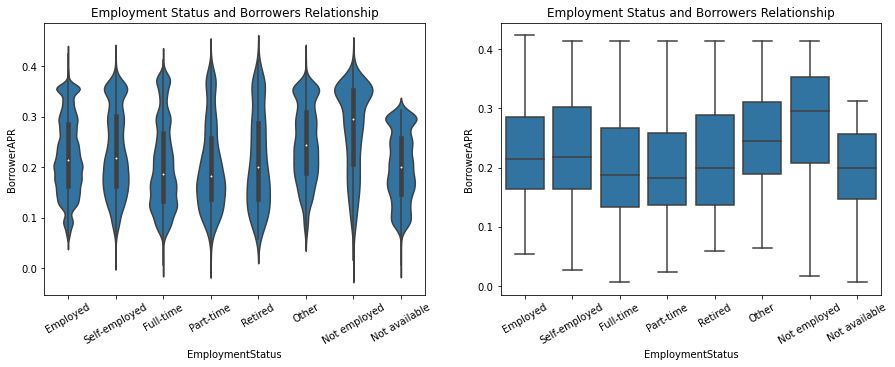

In [22]:
plt.figure(figsize = [15, 5])
color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.violinplot(data=loan, x='EmploymentStatus', y='BorrowerAPR', color = color)
plt.title('Employment Status and Borrowers Relationship')
plt.xticks(rotation=30);

plt.subplot(1,2,2)
sb.boxplot(data=loan, x='EmploymentStatus', y='BorrowerAPR', color = color)
plt.title('Employment Status and Borrowers Relationship')
plt.xticks(rotation=30);

**Observation(s)**
> 1. The relationship for most of the categories of Employment Status is multi-modal
> 2. "Not employed" status is right skewed while "Part-time" is left skewed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Correlation matrix plots helped to preview all possibles variables related on BorrowerAPR we are analyzing. Out of all variables, ProsperScore has stronger relationship with BorrowerAPR which is a negative correlation. Borrower APR is also negatively associated with the loan original amount, which mean that the more the loan amount, the lower the borrowers APR.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a positive coorelation between "Loan original amount" and "Stated Monthly Income" as well as "Loan original amount" and "Prosper Score". This shows that the higher the stated monthly income, the more money they might borrow which make sense. Also since there is a a positive coorelation between Proper score and Loan original amount, people who borrow more have a high chance of getting higher Prosper score because they earn more and can pay their loan.
There is a interaction between prosper rating and term. there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers and most of the prosper ratings are 36 month term



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Prosper Rating, Loan Original Amount and Term Interaction using Box Plot

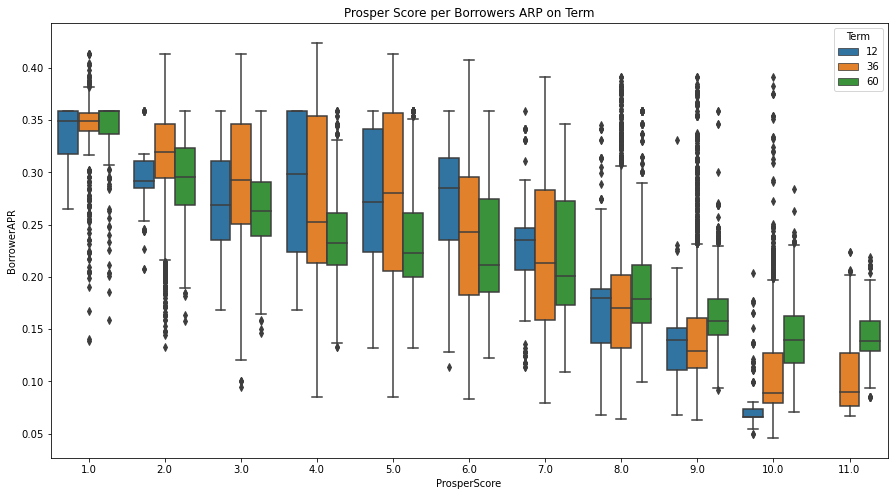

In [23]:
plt.figure(figsize = [15, 8])
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', hue='Term')
plt.title('Prosper Score per Borrowers ARP on Term');

**Observation(s)**
> 1. For ProsperScore, there are clearly negative relationship with BorrowerAPR even with Loan Term value

### Employment Status, Term, Loan Original Amount and Borrower ARP Interact

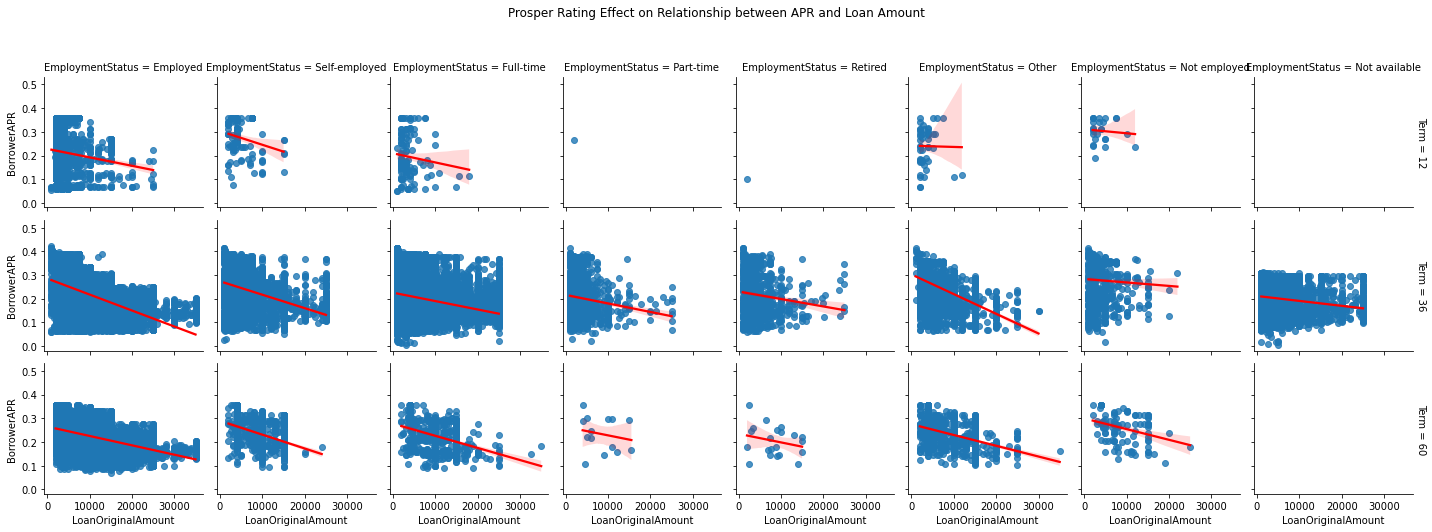

In [24]:
g = sb.FacetGrid(data = loan, col = 'EmploymentStatus', row = 'Term', height = 2.5,
                margin_titles = True)
g.map(sb.regplot, 'LoanOriginalAmount','BorrowerAPR', line_kws={"color": "red"})
g.set_titles('{col_name}')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount')
plt.subplots_adjust(top=0.85);

**Observation(s)**
> 1. FacetGrid: This visualization helps to analyze BorrowerAPR vs LoanOriginal on difference Terms and Employment status. This visual still confirms 36 month term having most record of the distributions accross the Employment State. As Loan amount increases Borrower ARP decreases One interesting thing is the fit regression line that is downward for all except the "Not employed" of the 36 months term with corelation tending to 0.

### Effect of Prosper Rating on Borrowers APR and Loan Amount

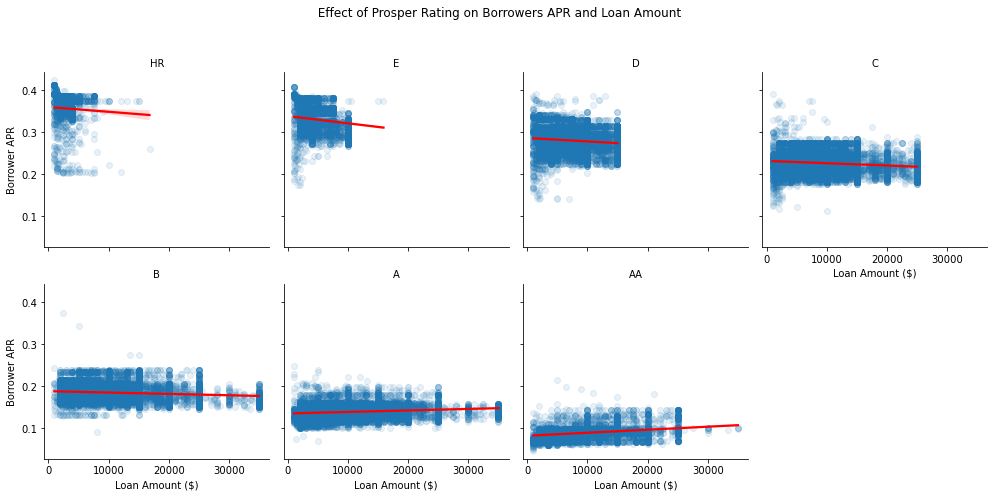

In [25]:
g=sb.FacetGrid(data=loan,col='ProsperRating (Alpha)', height=3.5, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', line_kws={"color": "red"}, scatter_kws={'alpha':0.1},x_jitter=0.04);
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle(' Effect of Prosper Rating on Borrowers APR and Loan Amount');
plt.subplots_adjust(top=0.85)

**Observation(s)**
> 1. The loan amount increases with better rating while borrower APR decreases with better rating. It is also good to note that the relationship between borrower APR and loan amount turns from negative to slightly positive change when the Prosper ratings are increased. This might be as a result of people with A or AA ratings borrowing more money, but people with lower ratings tend to borrow less money, decreasing borrowers APR could encourage them to borrow more. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> One major thing that strengthen by assumption of consistent negative correlation between BorrowerAPR anf ProsperScore even with the addition of the Term variable. It was still negative for the "Employment Status, Term, Loan Original Amount and Borrower ARP Interact" visual except for the "Not employed" of the 36 months term

### Were there any interesting or surprising interactions between features?

> One interesting thing is the fit regression line that is downward for all except the "Not employed" of the 36 months term. Also the loan amount increases with better rating while borrower APR decreases with better rating. It is also good to note that the relationship between borrower APR and loan amount turns from negative to slightly positive change when the Prosper ratings are increased. This might be as a result of people with A or AA ratings borrowing more money, but people with lower ratings tend to borrow less money, decreasing borrowers APR could encourage them to borrow more.

## Conclusions
> In the exploration, I discovered that the borrower APR is negatively correlated with original loan amount. The borrower APR also decreases with the increasingly prosper rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. It is interesting to also note there is a positive coorelation between "Loan original amount" and "Stated Monthly Income" as well as "Loan original amount" and "Prosper Score". This shows that the higher the stated monthly income, the more money they might borrow which make sense. 
> Also since there is a a positive coorelation between Proper score and Loan original amount, people who borrow more have a high chance of getting higher Prosper score because they earn more and can pay their loan. There is an interaction between prosper rating and term where there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers and most of the prosper ratings are 36 month term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.
